In [45]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

### Analyzing the Stroop Effect

Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

We could define the ***independent variable as the condition of the words***, that is to say if the words are congruent or incongruent.
To illustrate the condition, we could say that the word 'red' with a red ink is congruent, and conversely the word 'red' with a yellow ink is incongruent.

The ***dependent variable is the time*** it takes to name the ink colors.

<img src="example.png">

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

*** What is an appropriate set of hypotheses for this task?***

**Null hypothesis**

$H_0: μ_{incongruent} - μ_{congruent} = 0$

**Alternative hypothesis**

$H_1:  μ_{incongruent} - μ_{congruent} ≠ 0$

**Type one error = 5%**

The null hypothesis says there is no significant difference in the population average reponse time whatever the condition of the word is.

The alternative hypothesis says there is a significant difference (positive or negative).


*** What kind of statistical test do you expect to perform? ***

We choose to do a t-test for the following reasons:
- Small sample data 
- One independent, categorical variable that has two levels/groups.
- One continuous dependent variable.
- The varainces of two normal distributions are not know


More on t-test : 
https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php
https://www.investopedia.com/terms/t/t-test.asp

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [46]:
# create a data frame 
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [47]:
# report descriptive statistics 
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

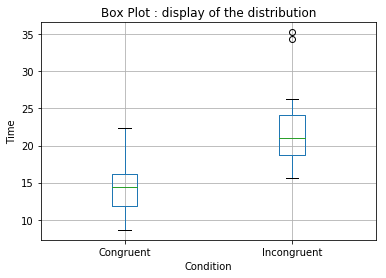

In [48]:
# Boxplot
plt.title('Box Plot : display of the distribution')
plt.xlabel('Condition')
plt.ylabel('Time')
df.boxplot()

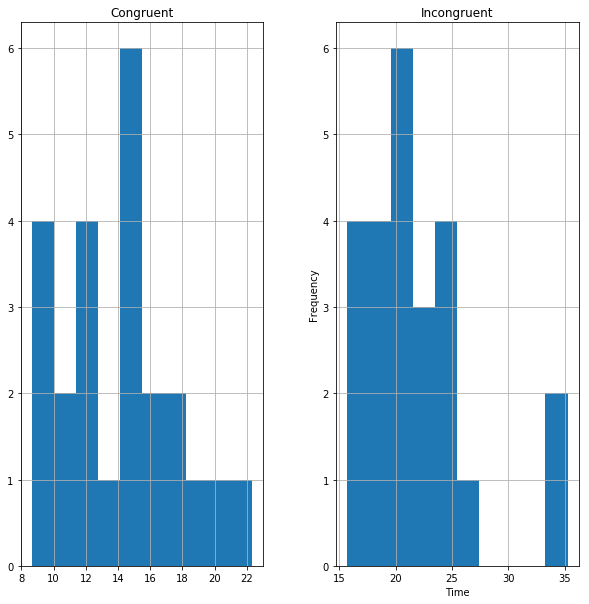

In [49]:
# Histogram 
df.hist(figsize=(10,10))
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

We can observe on the box plot and the histograms that the test withcongruent words have a median lower than the incongruent one, and we see that this relation is true for all the quartile.

This suggest that for the studied population that it is a difference in the average time to name the color ink.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [50]:
# sample size 
N = df.shape[0]
# degrees of freedom
freedom = N-1
# create a dataframe with the congruent test
df_c = df['Congruent']
# create a dataframe with the incongruent test
df_i = df['Incongruent']
# t-test 
ttest = stats.ttest_rel(df_c,df_i)
# t-critical
t_critical = stats.t.ppf(q = 0.95, df=freedom)

print(ttest)
print(t_critical)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)
1.71387152775


***ttest > t-critical***

So, we reject the Null Hypothesis.

The difference between the congruent test and the incongruent test seems significant.

We could expect that in average a person can perform the congruent test faster than the incongruent.